In this notebook, I am analysing a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease and I am trying to predict motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 
voice measures.

Author: Kenneth Z

In [5]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  889k  100  889k    0     0  1234k      0 --:--:-- --:--:-- --:--:-- 1234k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4423  100  4423    0     0  18741      0 --:--:-- --:--:-- --:--:-- 18821


I did this code below to read what is inside the names so I know what we are wanting to predict. 
In this case, we are trying to predict the 
motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 
voice measures.

In [6]:
!ls

Parkinsons.ipynb  parkinsons_updrs.data  parkinsons_updrs.names  README.md


In [7]:
!cat *.names

Parkinsons Telemonitoring Data Set  

Abstract: Oxford Parkinson's Disease Telemonitoring Dataset


Data Set Characteristics:  Multivariate
Attribute Characteristics:  Integer, Real
Associated Tasks:  Regression
Number of Instances:  5875
Number of Attributes:  26
Area:  Life
Date Donated:  2009-10-29


SOURCE:

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) 
and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in 
collaboration with 10 medical centers in the US and Intel Corporation who 
developed the telemonitoring device to record the speech signals. The 
original study used a range of linear and nonlinear regression methods to 
predict the clinician's Parkinson's disease symptom score on the UPDRS scale.



DATA SET INFORMATION:

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progr

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Put the data into the dataframe (stated in the variable, df)

In [9]:
df=pd.read_csv('parkinsons_updrs.data')
df.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317   ...           0.230       0.01438   
1     0.000017     0.00132      0.00150   ...           0.179       0.00994   
2     0.000025     0.00205      0.00208   ...           0.181       0.00734   
3     0.000027     0.00191      0.00264   ...           0.327       0.01106   
4     0.000020     0.00093      0.00130   ...           0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

In [10]:
df.shape

(5875, 22)

As we are now in the cleaning step. This code below check the data for any nulls. In this case, the output return to be false, meaning there is no null so we do not need to do anything about that

In [11]:
df.isnull().values.any()

False

In [12]:
df.describe()

subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     29.018942     0.006154     0.000044     0.002987     0.003277   
std      10.700283     0.005624     0.000036     0.003124     0.003732   
min       7.000000     0.000830     0.000002     0.000330     0.000430   
25%      21.371000     0.003580     0.000022     0.001580     0.001820   
50%      27.576000     0.004900     0.000035     0.002250     0.002490   
75%      36.399000     0.006800     0.000053     0.003290     0.003460   
max      54.992000     0.099990     0.000446     0.057540     0.069560   

          ...       Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  Shimmer:APQ11  \
count     ...       5875.000000   5875.000000   5875.000000    5875.000000   
mean      ...          0.310960      0.017156      0.020144       0.027481   
std       ...          0.230254      0.013237      0.016664       0.019986   
min       ...          0.026000      0.001610      0.001940       0.002490   
25%       ...          0.175000      0.009280      0.010790       0.015665   
50%       ...          0.253000      0.013700      0.015940       0.022710   
75%       ...          0.365000      0.020575      0.023755       0.032715   
max       ...          2.107000      0.162670      0.167020       0.275460   

       Shimmer:DDA          NHR          HNR         RPDE          DFA  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean      0.051467     0.032120    21.679495     0.541473     0.653240   
std       0.039711     0.059692     4.291096     0.100986     0.070902   
min       0.004840     0.000286     1.659000     0.151020     0.514040   
25%       0.027830     0.010955    19.406000     0.469785     0.596180   
50%       0.041110     0.018448    21.920000     0.542250     0.643600   
75%       0.061735     0.031463    24.444000     0.614045     0.711335   
max       0.488020     0.748260    37.875000     0.966080     0.865600   

               PPE  
count  5875.000000  
mean      0.219589  
std       0.091498  
min       0.021983  
25%       0.156340  
50%       0.205500  
75%       0.264490  
max       0.731730  

[8 rows x 22 columns]

Looking at the types in the dataset. 

In [13]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

As seen from types above, they looked reasonable as the data given in this case has all numbers, hence there is no change needed for that data. 

We do the histogram to check if there is any relationships. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f7d743c18>,
      dtype=object)

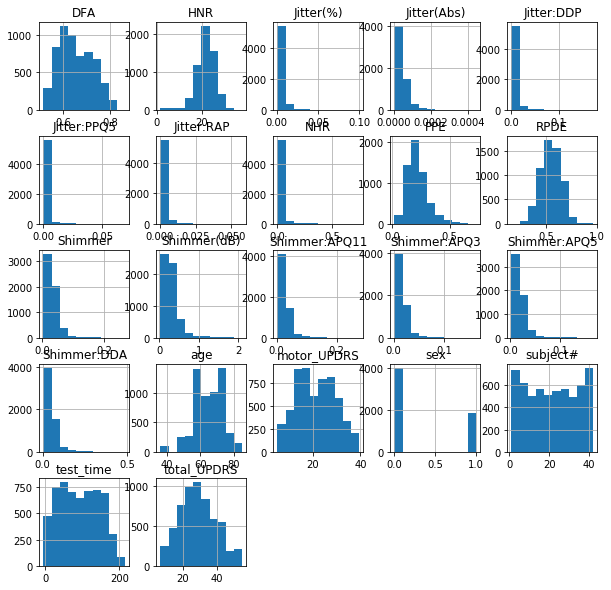

In [14]:
df.hist(figsize=(10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


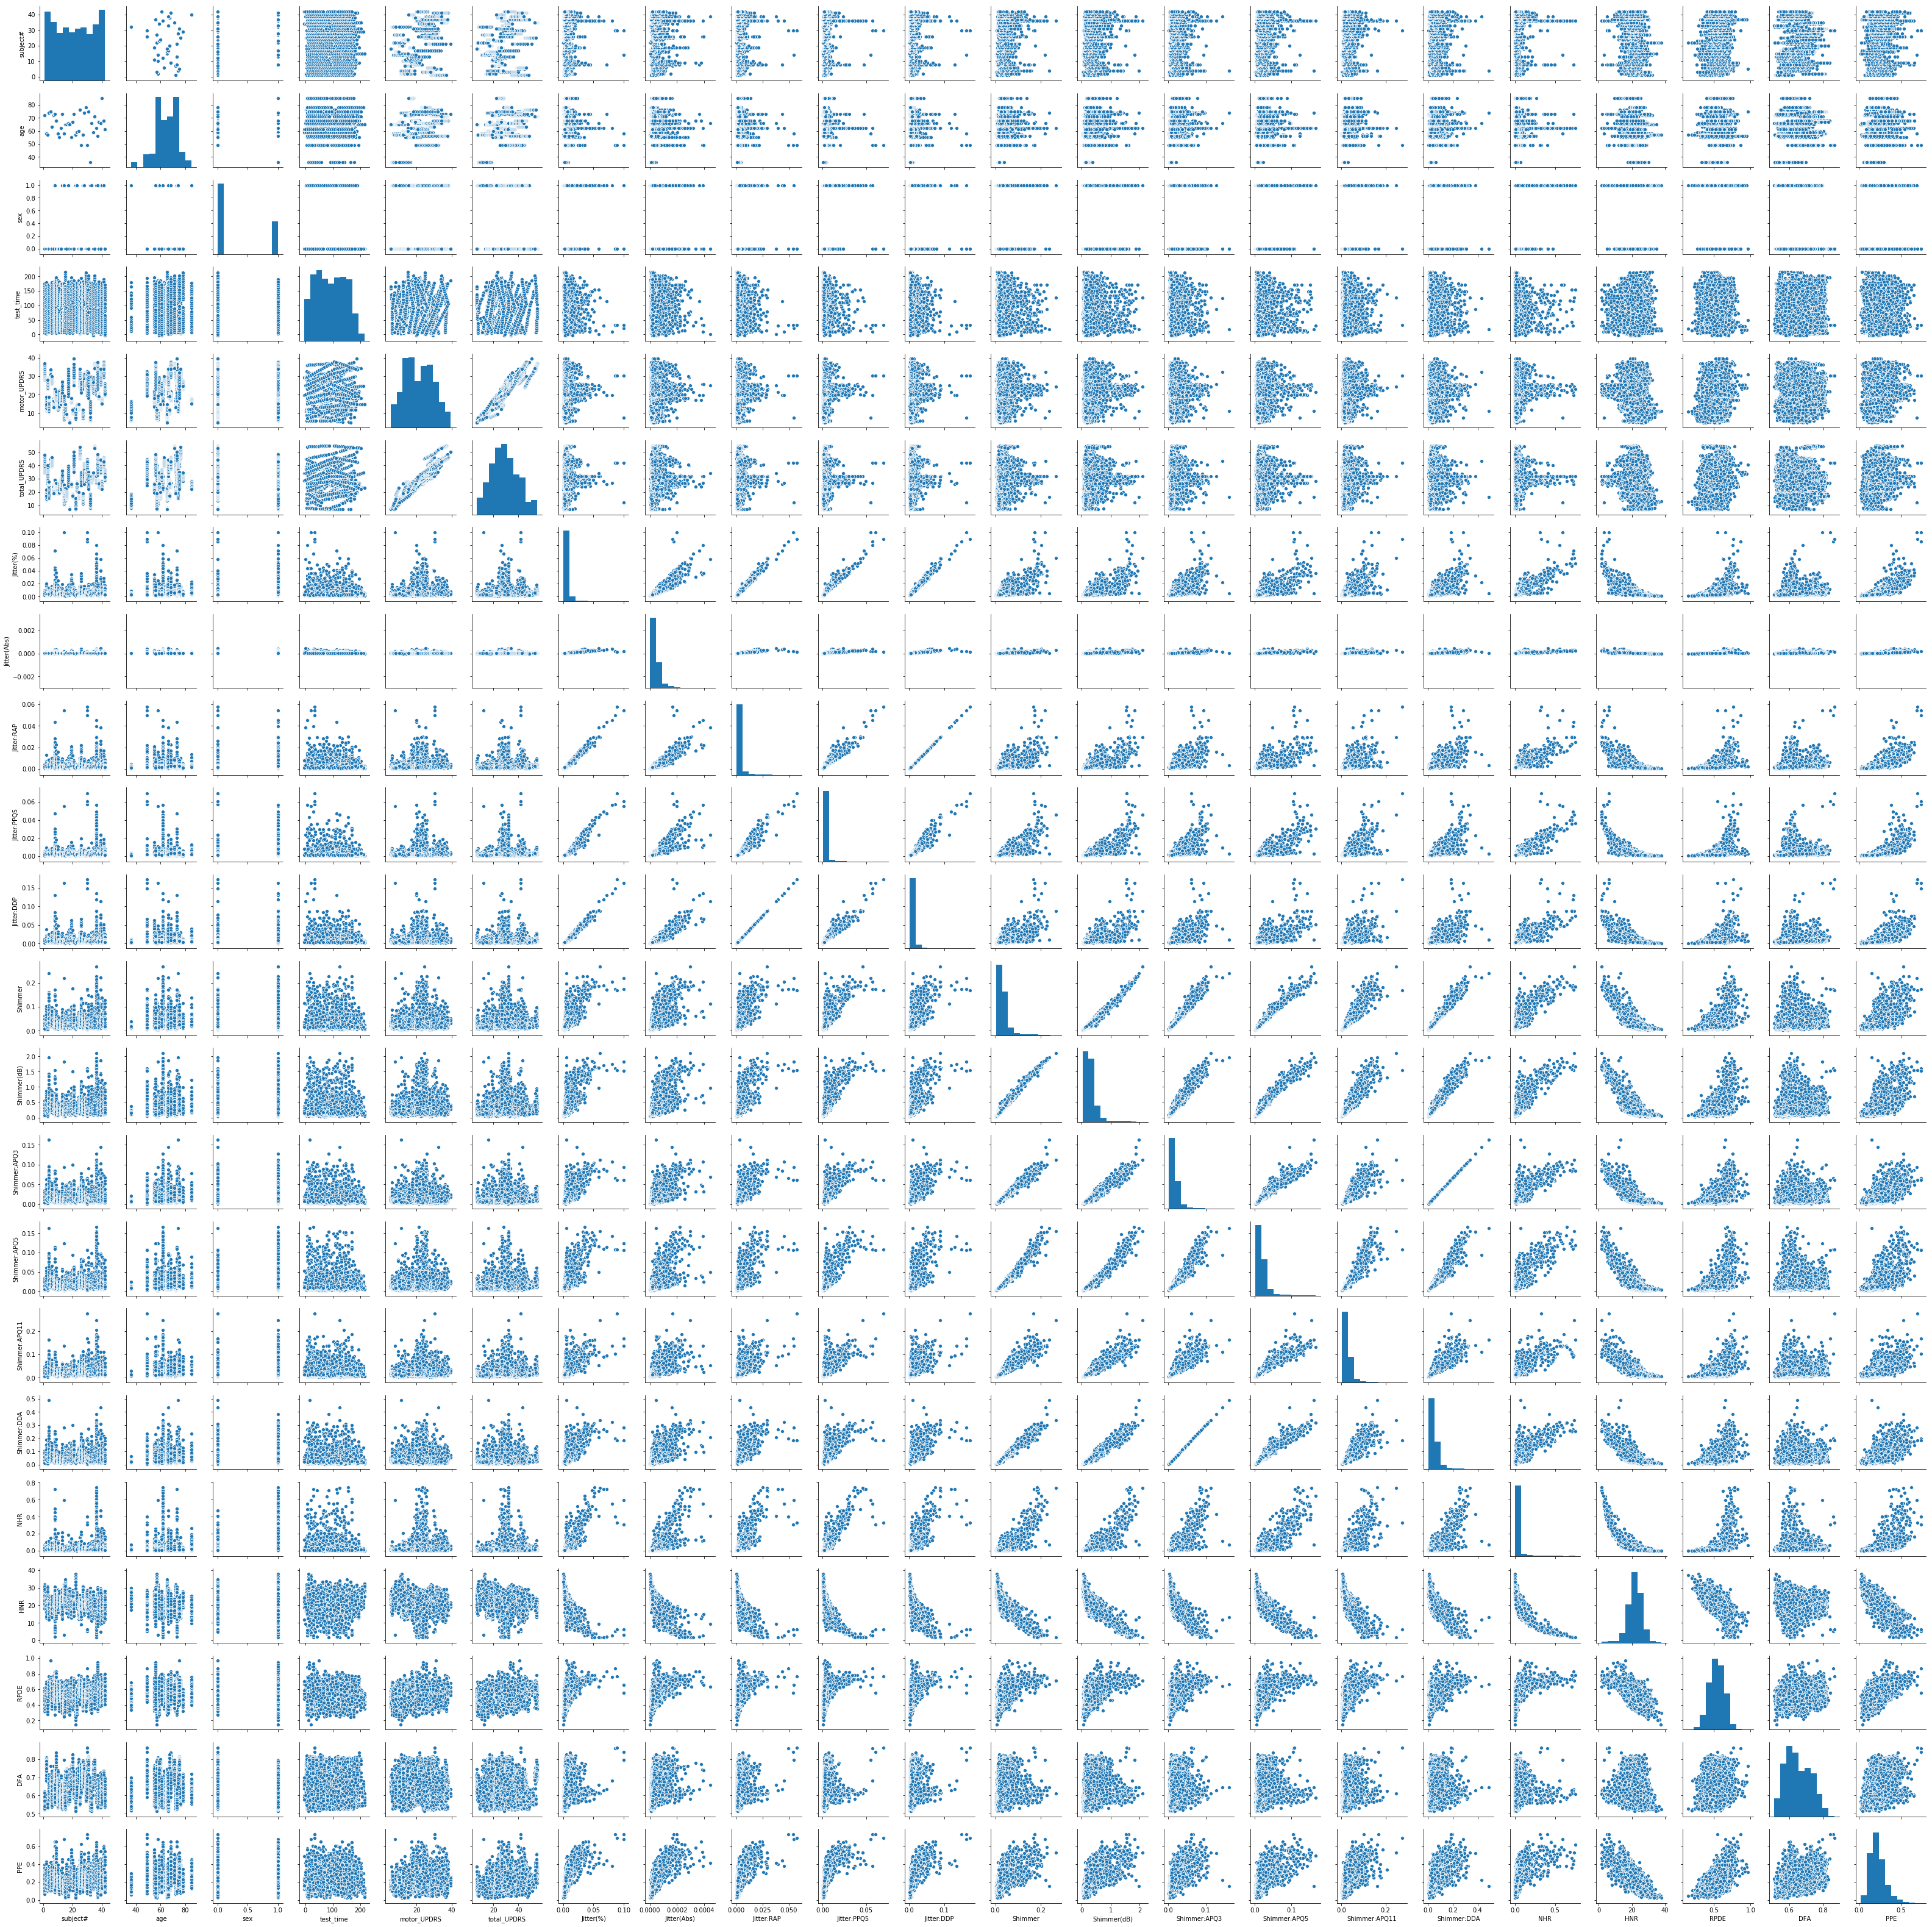

In [15]:
sns.pairplot(df, size=2.0)

There seems to be a positive relationship between total_UPDRS and motor UPDRS. But for the rest of the data, it is mixed. 

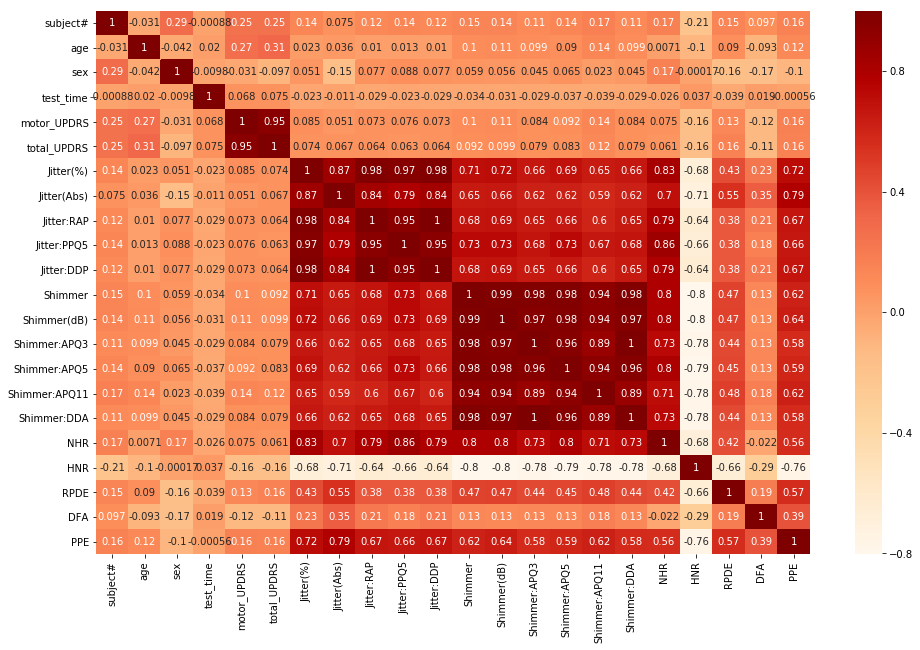

In [16]:
ax, fig=plt.subplots(figsize=(16,10))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


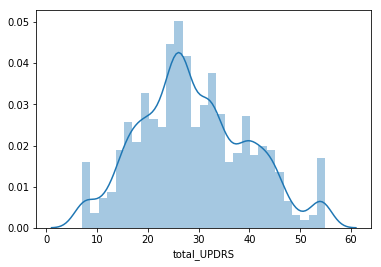

In [18]:
sns.distplot(df['total_UPDRS'])

We need to put the dataset into the training set and into test set model. 

In [23]:
from sklearn.model_selection import train_test_split
x=df.drop('motor_UPDRS',axis=1)
x=df.drop('Jitter(%)', axis=1)
x=df.drop('Jitter(Abs)', axis=1)
x.head





<bound method NDFrame.head of       subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0    5.64310       28.199       34.398    0.00662   
1            1   72    0   12.66600       28.447       34.894    0.00300   
2            1   72    0   19.68100       28.695       35.389    0.00481   
3            1   72    0   25.64700       28.905       35.810    0.00528   
4            1   72    0   33.64200       29.187       36.375    0.00335   
5            1   72    0   40.65200       29.435       36.870    0.00353   
6            1   72    0   47.64900       29.682       37.363    0.00422   
7            1   72    0   54.64000       29.928       37.857    0.00476   
8            1   72    0   61.66900       30.177       38.353    0.00432   
9            1   72    0   68.68800       30.424       38.849    0.00496   
10           1   72    0   75.65300       30.670       39.340    0.00465   
11           1   72    0   82.65300       30.917       39.

In [26]:
y=df['motor_UPDRS']
y.head()

0    28.199
1    28.447
2    28.695
3    28.905
4    29.187
Name: motor_UPDRS, dtype: float64

In [27]:
train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [29]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
model.coef_

array([-2.27339738e-16, -8.45503131e-16, -2.21596266e-15,  4.42085699e-17,
        1.00000000e+00,  6.83525212e-16, -1.74622185e-13,  5.60194668e-13,
       -3.33548612e-14, -7.28031899e-14, -1.57907686e-14, -2.92964710e-16,
       -3.23913965e-11,  2.51408017e-14,  8.90060707e-15,  1.07896898e-11,
        1.17103371e-15, -1.20330249e-16, -4.07846868e-16, -9.56745729e-18,
       -1.94293126e-15])

In [32]:
predicted=model.predict(test_x)

In [34]:
plt.scatter=(test_y,predicted)